### Gnu Radio Companion signal with Machine Learning

In [212]:
import numpy
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
noise = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_1"), dtype=numpy.uint16)#NO MESSAGE
fm991 =  numpy.fromfile(open("C:/Users/janat/Downloads/teste.dat"), dtype=numpy.uint16) 
fm889 =  numpy.fromfile(open("C:/Users/janat/Downloads/fm_88.9_a1"), dtype=numpy.uint16) 
fm932 =  numpy.fromfile(open("C:/Users/janat/Downloads/fm_93.9_a2"), dtype=numpy.uint16) 


### Creating the dataset is refer to FM frequence of 99,1 signal and the noise of 105 Fm
* On this topic, we are going to separated the dataset between slices of 200000 rows each columns for both data, the noise one and the fm 99,1
* On the following , we have each autocorrelation , to understand how each dataframe is related and by that , we can make comparisson about those correlations
* Secondly , we apply the fourier on the both signal to notice spectrum for each and the distribution of frequence along with time
* Thirdly, we plot how distance each value find themselves from each dataset , noise and fm 99,1, to understand what metric of distance we are going to use, such as euclidean method or manhatan method

### Supervising learning with Knn and avaluations scores

* Now that , we already understand the data by analysing autocorrelation, distribution along the time, how closely or far way each value are , we have to apply the algorithm machine learing K -nearest neighboors 
* Firstly , we slice the data on training and test, 70% and 30 % each, for our algorithm understand the pattern and learn what makes the data a signal with message and what's not.
*Secondly, we apply the KNN method, fit and prediction to score how accuracy our method was related to the original data.
* On this project, we using F1_Score, Precicion, MAE, RMSE, Recall, Score and Acurracy, as tools to metric the quality about our prediction. 
* After that, we have to improve our data and make sure the responde by the metric tools was indeed correct, therefore we make sure by using Cross Validation with 10 folds, GridSearch to improving Knn method and RandomGridSearch to take the better method 
* On the final topic, we have an answer about the method by using confusion matrix and report classification 

In [213]:
# Creating empy array to fill each columns with the dataset
empty_1 =  np.empty([5]) # The dataset will be with 5 columns , each represent a signal 
empty_1 = pd.DataFrame()
empty_0 = empty_1
#############################################
signalfm1 , signalfm2 , signalfm3= fm991[:200000] , fm991[200000:400000], fm991[400000:600000]
signalfm4 , signalfm5 = fm991[600000:800000], fm991[800000:1000000]
noise1 , noise2 , noise3= noise[:200000] , noise[200000:400000], noise[400000:600000]
noise4 , noise5 = noise[600000:800000], noise[800000:1000000]
##################################################
conjunto = [signalfm1,signalfm2,signalfm3,signalfm4,signalfm5]
i=0
for i in range(0,5):
    empty_1[i] = pd.DataFrame(conjunto[i])
    i+=1
FM = empty_1
FM = FM.rename(columns = {0:'sinal1', 1:'sinal2' , 2:'sinal3', 3:'sinal4',4:'sinal5'})
FM['Signal'] = 1 # AS KNOWS EXISTENCE OF SIGNAL
FM

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,19417,52445,35435,57959,63236,1
1,47326,48294,14884,48035,15194,1
2,40300,3394,56237,3592,15010,1
3,14900,48106,48314,48332,15524,1
4,16708,33843,9378,22646,57902,1
...,...,...,...,...,...,...
199995,48279,48326,48303,15463,15541,1
199996,62199,3299,52480,17367,5479,1
199997,48201,15083,47948,48037,15319,1
199998,46937,39102,26211,45036,61944,1


,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,19417,52445,35435,57959,63236,1
1,47326,48294,14884,48035,15194,1
2,40300,3394,56237,3592,15010,1
3,14900,48106,48314,48332,15524,1
4,16708,33843,9378,22646,57902,1
...,...,...,...,...,...,...
199995,48279,48326,48303,15463,15541,1
199996,62199,3299,52480,17367,5479,1
199997,48201,15083,47948,48037,15319,1
199998,46937,39102,26211,45036,61944,1


#### AutoCorrelation 

<function matplotlib.pyplot.show(close=None, block=None)>

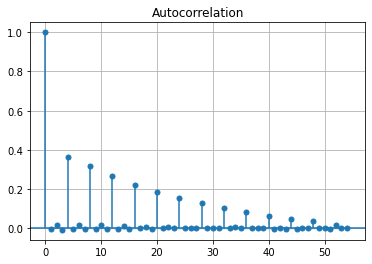

In [91]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
fmradio = FM[['sinal5']]
#mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply
#fmradio = np.abs(mm.fit_transform(fmradio))
plot_acf(np.abs(fmradio))
plt.grid(True)
plt.show

In [92]:
FM.mean()

sinal1    32166.867905
sinal2    32140.678525
sinal3    32180.515720
sinal4    32164.488535
sinal5    32158.360700
Signal        1.000000
dtype: float64

In [93]:
# Creating empy array to fill each columns with the dataset

conjunto_1 = [noise1,noise2,noise3, noise4, noise5]
i=0
for i in range(0,5):
    empty_0[i] = pd.DataFrame(conjunto_1[i])
    i+=1
Noise = empty_0
Noise = Noise.rename(columns = {0:'sinal1', 1:'sinal2' , 2 :'sinal3',3:'sinal4',4:'sinal5'})
#Noise = Noise.drop(columns='index')
Noise['Signal'] = 0

<function matplotlib.pyplot.show(close=None, block=None)>

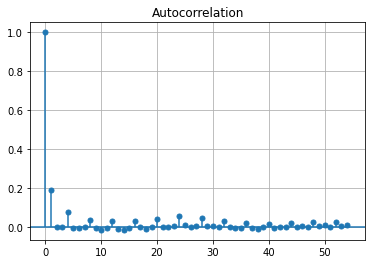

In [94]:
nois = pd.DataFrame(Noise[['sinal5']])
#mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply
#nosignal1 = mm.fit_transform(nois)
plot_acf(np.abs(nois))
plt.grid(True)
plt.show


In [95]:
Noise.mean()

sinal1    37722.086050
sinal2    37654.745015
sinal3    37625.668400
sinal4    37715.462650
sinal5    37712.904590
Signal        0.000000
dtype: float64

###  Why Would You Need the Fourier Transform?
* The Fourier transform is useful in many applications. For example, Shazam and other music identification services use the Fourier transform to identify songs. JPEG compression uses a variant of the Fourier transform to remove the high-frequency components of images. Speech recognition uses the Fourier transform and related transforms to recover the spoken words from raw audio.

* In general, you need the Fourier transform if you need to look at the frequencies in a signal. If working with a signal in the time domain is difficult, then using the Fourier transform to move it into the frequency domain is worth trying

<function matplotlib.pyplot.show(close=None, block=None)>

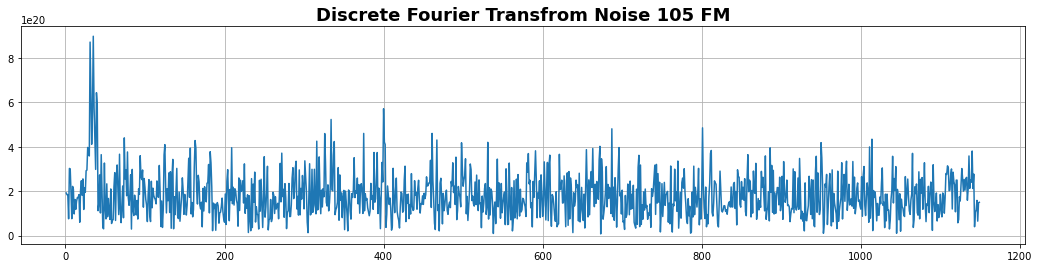

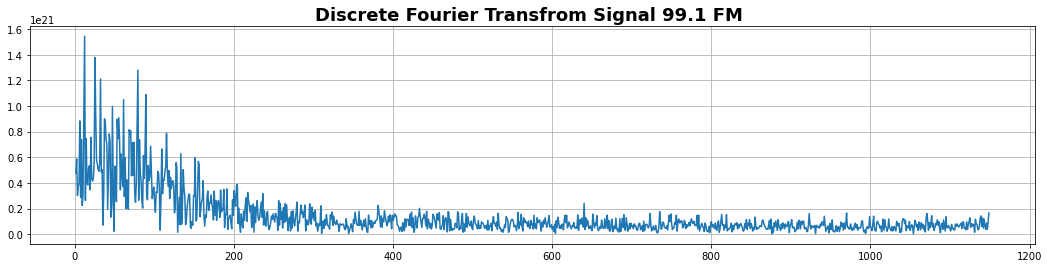

In [100]:
ny0 = numpy.fromfile(open("C:/Users/janat/Downloads/sem_msg_1"), dtype=numpy.uint64) #NO MESSAGE
fm991 =  numpy.fromfile(open("C:/Users/janat/Downloads/teste.dat"), dtype=numpy.uint64) 
fm889 =  numpy.fromfile(open("C:/Users/janat/Downloads/fm_88.9_a1"), dtype=numpy.uint16) 
fm932 =  numpy.fromfile(open("C:/Users/janat/Downloads/fm_93.9_a2"), dtype=numpy.uint16) 
#freq = np.fft.fftfreq()
NOsignal = ny0[:2299]
Signal = fm991[:2299]
##############################
fourier= np.fft.fft(NOsignal) # FFT FROM THE NO SIGNAL DATASET
no = NOsignal.size
timestep = 1/ no
freqno = np.fft.fftfreq(no,d=timestep)
mascara = freqno > 0
############################
plt.figure(figsize= (18,4))
plt.title("Discrete Fourier Transfrom Noise 105 FM", size = 18, fontweight = 'bold')
plt.plot(freqno[mascara],np.abs(fourier[mascara]))
plt.grid(True)
plt.show
################################
fouriersignal= np.fft.fft(Signal) # FFT FROM THE NO SIGNAL DATASET
sig = Signal.size
timestep = 1/ sig
freqsign= np.fft.fftfreq(sig,d=timestep)
masksig = freqsign > 0
#########################
plt.figure(figsize= (18,4))
plt.title("Discrete Fourier Transfrom Signal 99.1 FM ", size = 18, fontweight = 'bold')
plt.plot(freqsign[masksig],np.abs(fouriersignal[masksig]))
plt.grid(True)
plt.show

In [101]:
#FM = pd.DataFrame(np.fft.rfftn(FM.iloc[:,1:5]))
#Noise = pd.DataFrame(np.fft.rfftn(Noise.iloc[:,1:5]))
#Noise= Noise.iloc[:10000]
Noise['Signal'] = 0
FM['Signal'] = 1

In [102]:
gnu = pd.concat([FM,Noise]).reset_index()
#gnu= gnu.drop(columns=['index'])
gnu  

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,19417,52445,35435,57959,63236,1
1,1,47326,48294,14884,48035,15194,1
2,2,40300,3394,56237,3592,15010,1
3,3,14900,48106,48314,48332,15524,1
4,4,16708,33843,9378,22646,57902,1
...,...,...,...,...,...,...,...
399995,199995,47779,47744,15240,47744,47948,0
399996,199996,32609,52480,4399,28439,52480,0
399997,199997,15125,47948,47914,47931,47948,0
399998,199998,28439,52480,28439,60045,15256,0


In [262]:
signal = gnu[gnu['Signal'] ==1]# JUST THE ONE HAS SIGNAL
signal.head()

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,19417,52445,35435,57959,63236,1
1,1,47326,48294,14884,48035,15194,1
2,2,40300,3394,56237,3592,15010,1
3,3,14900,48106,48314,48332,15524,1
4,4,16708,33843,9378,22646,57902,1


In [263]:
nosignal = gnu[gnu['Signal'] ==0] # NO SIGNAL
nosignal.head()

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
200000,0,19417,32609,15522,25989,61076,0
200001,1,47326,15125,14804,47676,47744,0
200002,2,19417,60045,525,527,43622,0
200003,3,47326,15248,14954,14954,47779,0
200004,4,43621,38387,43621,4399,43622,0


#### Distance between each data related 

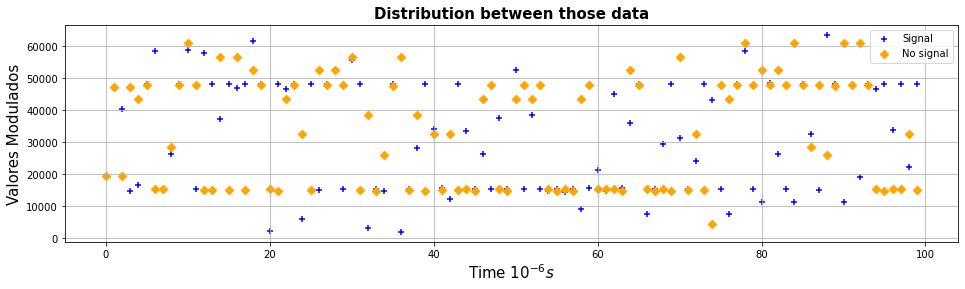

In [265]:
signal = signal[['index','sinal1']]
signal = signal.iloc[:100]
nosignal = nosignal[['index','sinal1']]
nosignal = nosignal.iloc[:100]
########################################
plt.figure(figsize = (16,4))
plt.title("Distribution between those data", fontweight='bold', size = 15)
plt.scatter(signal['index'], signal['sinal1'], color = 'b', marker = "+", label = 'Signal')
plt.scatter(nosignal['index'], nosignal['sinal1'], color = 'orange', marker = 'D',label = 'No signal')
plt.xlabel('Time $10^{-6} s$', size = 15)
plt.ylabel('Valores Modulados', size = 15)
plt.legend()
plt.grid()

### Supervising Machine Learning algorithm

* We are goint to slice the data between train and test , chosing our features and applying the knn method

In [106]:
X = gnu.iloc[:,1:6] # THE TRAINING DATASET
X

,sinal1,sinal2,sinal3,sinal4,sinal5
0,19417,52445,35435,57959,63236
1,47326,48294,14884,48035,15194
2,40300,3394,56237,3592,15010
3,14900,48106,48314,48332,15524
4,16708,33843,9378,22646,57902
...,...,...,...,...,...
399995,47779,47744,15240,47744,47948
399996,32609,52480,4399,28439,52480
399997,15125,47948,47914,47931,47948
399998,28439,52480,28439,60045,15256


In [107]:
y = gnu.iloc[:,6] # THE TARGET DATASET
y 

0         1
1         1
2         1
3         1
4         1
         ..
399995    0
399996    0
399997    0
399998    0
399999    0
Name: Signal, Length: 400000, dtype: int64

In [121]:
print("Describe",FM.describe())#SIGNAL
print("Info",FM.info())#SIGNA

Describe               sinal1         sinal2         sinal3         sinal4  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean    32166.867905   32140.678525   32180.515720   32164.488535   
std     17687.497541   17677.014578   17678.484959   17655.265219   
min        21.000000      21.000000      25.000000      25.000000   
25%     15471.000000   15471.000000   15471.000000   15480.000000   
50%     31920.000000   31919.000000   31923.000000   31920.000000   
75%     48260.000000   48261.000000   48261.000000   48265.000000   
max     65512.000000   65511.000000   65514.000000   65511.000000   

              sinal5    Signal  
count  200000.000000  200000.0  
mean    32158.360700       1.0  
std     17664.948832       0.0  
min        22.000000       1.0  
25%     15476.000000       1.0  
50%     31920.000000       1.0  
75%     48264.000000       1.0  
max     65511.000000       1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 1

In [109]:
Noise.describe() # NO SIGNAL

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0
mean,37722.086050,37654.745015,37625.668400,37715.462650,37712.904590,0.0
std,16165.765648,16182.260399,16183.619654,16167.967969,16141.396291,0.0
min,525.000000,525.000000,525.000000,525.000000,525.000000,0.0
25%,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,0.0
50%,47676.000000,47676.000000,47676.000000,47676.000000,47676.000000,0.0
75%,47948.000000,47948.000000,47948.000000,47948.000000,47948.000000,0.0
max,61077.000000,61077.000000,61077.000000,61077.000000,61077.000000,0.0


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state= 100) # 35 % TO TEST 

print("lenght x train = {} \n lenght x test = {} " .format(len(X_train), len(X_test)))

lenght x train = 240000 
 lenght x test = 160000 


In [112]:
mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
#gnu0 = mm.fit_transform(df0)
#gnu1 = mm.fit_transform(df1)

In [113]:
X_train

array([[ 0.33153153,  0.17170823,  0.60194842, -0.13221147,  0.8645512 ],
       [-0.20103833, -0.94960986,  0.93351555,  0.72354396, -0.78160217],
       [ 0.07787448, -0.70966116,  0.71744873,  0.43251993,  0.08389579],
       ...,
       [ 0.45848221, -0.53876223,  0.4635435 , -0.54405522, -0.53883273],
       [ 0.88483738,  0.03363924,  0.22096841, -0.36777326, -0.49048652],
       [ 0.60204611,  0.86458795, -0.13225122, -0.13221147, -0.526708  ]])

In [114]:
X_test

array([[-0.53821958, -0.53876223,  0.4635435 , -0.53883273,  0.46361054],
       [ 0.17159872, -0.70975278,  0.43333995, -0.03283144, -0.89710778],
       [ 0.4743625 ,  0.46684176,  0.47459879,  0.46816113, -0.52481446],
       ...,
       [-0.54609864, -0.53876223,  0.4635435 ,  0.46309135, -0.5377638 ],
       [-0.52667583,  0.47423231, -0.52865367, -0.52713557,  0.47433039],
       [-0.54396091,  0.46311594,  0.45838232,  0.4573802 , -0.54619308]])

### Creating KNN = ( K Neighrest Neighbour Classifier )
##### p, default=2
* Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. \newline

* for p = 2 , we have $\sqrt{(a1-b2)^{2} +(a1-b2)^{2}}$ , Euclidean Distance 
* for p = 1 , we have $ |(a1-b2)| + |(a1-b2)| $ , Manhattan Distance 

##### weights{‘uniform’, ‘distance’} or callable, default=’uniform’

* uniform’ : uniform weights. All points in each neighborhood are weighted equally.
* ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

#### Types of Knn method
* KNN Classifier = chooses the same class as most of the 'n' nearest neighbors of the data to be sorted
* KNN Regressor = choose the average of the label of the 'n' neighbors

### Number of K, how do we choose ?
* $\sqrt{n}$ , where n can be number of data points
* Odd value of K is selected to avoid confusion between two classes of data
* By choosing smaller number, you can find yourself not much accurate, by chossing larger number , the classification may be tend to the label with more frequence

In [216]:
knn = KNeighborsClassifier(n_neighbors= 9,weights='distance', p=2, leaf_size=50)
KNN = KNeighborsClassifier()# WE CHOOSE MANHATAM DISTANCE
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred.shape)
print(y_test.shape)


(160000,)
(160000,)


RMSE (root mean squared error): is the measure that calculates "the root mean square" of errors between observed (actual) values and predictions (hypotheses).

$\sqrt{\frac{1}{n}\sum(yj - \vec{y}j)^{2} }$

* expresses the mean error of the predictive model, in relation to the original data (training and/or testing).
* They are in the 0-infinity range and return the magnitude of errors and not their direction.
* The smaller the better the cases

In [222]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt
train_preds = knn.predict(X_train)
mse_1 = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_1)
###############################################
test_preds = knn.predict(X_test)
mse_2 = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_2)
##############################################
#,'Accuracy':accuracy.score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds)
metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test,y_test)
          ,'Accuracy':accuracy_score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds),
          'Recall':recall_score(y_test,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.344093,0.8816,0.8816,0.87299,0.816302


#### How the score number was calculated ?

* Accuracy = $\frac{True Positive (TP) + False Positive (FP)}{Total} $

is the number of hits in our model divided by the total sample.

* Precision = $\frac{True Positive (TP) }{True Positive (TP) + False Positive (FP)} $

of all the data classified as positive, how many are actually positive.

* Recall = $\frac{True Positive (TP) }{True Positive (TP) + False Negative (FP)} $ 

what is the percentage of data classified as positive compared to the actual number of positives that exist in our sample.


* F1_Score = $\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$ 

this metric combines precision and recall in order to bring a single number that determines the overall quality of our model

#### Cross-Validation
* The snippet below divides the dataset into 10 subsets (folds
* Then it will train the knn model 10 times
*For each execution, a different fold will be selected
* The result is an array with the evaluation of 10 scores


In [221]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNN, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=15)
tree_rmse_scores = np.sqrt(-scores)
# The results were not so good now
# Cross-validation lets you see beyond average performance,
# see also how accurate this is (standard deviation)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
pd.DataFrame(display_scores(tree_rmse_scores))

Scores: [0.36344136 0.37097264 0.35968174 0.3660117  0.36690706 0.36780025
 0.3693264  0.36754527 0.3769888  0.37034034 0.3633294  0.35930742
 0.37700648 0.36487439 0.37438618]
Mean: 0.36786129482297514
Standard deviation: 0.005297780004784158


""


#### Improving kNN performance in scikit-learn using GridSearchCV

So far we've used k =3 in kNN, but let's use GridSearchCV to find the best value for K .
When you use near neighbors, you have a much more variable prediction than you will use more neighbors:
* If you use only one neighbor, a forecast may change mainly from one point to another. When you think of your own neighbors, one may be quite different from the others. If you lived near a 1-N forecast outlier your right house.
* If you have multiple data points, the impact of an extremely different neighbor will be much smaller.
* If you use next risks, a prediction of each point risks being too close. 

In [226]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [3,5,7,9,11,13,15,19],
                         'weights': ['uniform', 'distance'],'p':range(1,2)
             ,'algorithm':['auto', 'kd_tree']
             }

gridsearch = GridSearchCV(KNN, parameters)
GridSearchCV(estimator=KNN,
             param_grid=parameters, scoring='neg_mean_squared_error',cv=5,)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19],
                         'p': range(1, 2), 'weights': ['uniform', 'distance']})

In [234]:
gridsearch.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [235]:
# A variavel best_estimator_ apresenta o melhor modelo com seus parametros
gridsearch.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

In [237]:
# Podemos visualizar os escores das avaliações (18) realizadas
# Podemos observar que o melhor escore é 49,689 relacionado com melhor estimator (linha 12)
# O resultado melhou o ultimo treinamento realizado 50,182
cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
nan {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
nan {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
nan {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
nan {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
nan {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
nan {'algorithm': 'auto', 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
nan {'algorithm': 'auto', 'n_

In [239]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.321404,0.047213,2.176204,0.179219,auto,1,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1...",0.919771,0.916333,0.917083,0.917542,0.919229,0.917992,0.001302,1
1,0.345532,0.065313,1.159623,0.117785,auto,1,1,distance,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1...",0.919771,0.916333,0.917083,0.917542,0.919229,0.917992,0.001302,1
2,0.365933,0.053654,3.003698,0.229082,auto,3,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1...",0.915625,0.911021,0.912062,0.910708,0.913312,0.912546,0.001789,9
3,0.354178,0.040681,1.427704,0.081589,auto,3,1,distance,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1...",0.917438,0.913312,0.914729,0.913062,0.916271,0.914963,0.001687,5
4,0.316876,0.062063,2.979398,0.118129,auto,5,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1...",0.910646,0.908604,0.908375,0.907563,0.911354,0.909308,0.001441,17
5,0.350525,0.122213,1.798934,0.114539,auto,5,1,distance,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1...",0.914438,0.912021,0.912438,0.910937,0.915604,0.913087,0.001693,7
6,0.332218,0.025649,3.431774,0.240756,auto,7,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1...",0.907646,0.906521,0.907813,0.905229,0.908125,0.907067,0.001066,23
7,0.315112,0.021827,2.028885,0.130980,auto,7,1,distance,"{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1...",0.913000,0.910771,0.912396,0.909792,0.913229,0.911838,0.001336,11
8,0.306968,0.019740,3.626961,0.136620,auto,9,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1...",0.905438,0.904646,0.905667,0.904312,0.906375,0.905288,0.000736,27
9,0.325656,0.013580,2.402012,0.183292,auto,9,1,distance,"{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1...",0.911167,0.909708,0.910542,0.908708,0.911396,0.910304,0.000989,13


In [240]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
######################
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

################################
acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':gridsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,test_preds_grid),
       'F1_Score':f1_score(y_test,test_preds_grid),
      'Recall':recall_score(y_test,test_preds_grid)}
###############################
acc = pd.DataFrame([acc])
acc

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
0,0.0,0.276326,0.923644,0.923644,0.918874,0.867496


#### When the number of possible options is very large, it is better to randomize, using RandomizedSearchCV
* When the number of possible options is very large, it is better to randomize
* It is similar to GridSearch, but without testing all possible alternatives, but without testing all possible alternatives, This can be accomplished using a RandomizedSearchCV class


In [242]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_neighbors':randint(low=1, high=200),
                         'leaf_size': randint(low=1, high=100),'p':range(1,2)
             ,'algorithm':['auto', 'kd_tree']
             }

randomsearch = RandomizedSearchCV(KNN, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020494CFF970>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020494CFF730>,
                                        'p': range(1, 2)},
                   random_state=42, scoring='neg_mean_squared_error')

In [246]:
randomsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 38, 'p': 1}

In [243]:
cvres = randomsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3462116404744358 {'algorithm': 'auto', 'leaf_size': 52, 'n_neighbors': 93, 'p': 1}
0.3652282391418641 {'algorithm': 'auto', 'leaf_size': 72, 'n_neighbors': 189, 'p': 1}
0.3412477106150311 {'algorithm': 'auto', 'leaf_size': 83, 'n_neighbors': 75, 'p': 1}
0.35213633723318016 {'algorithm': 'auto', 'leaf_size': 88, 'n_neighbors': 117, 'p': 1}
0.35484738503568924 {'algorithm': 'kd_tree', 'leaf_size': 24, 'n_neighbors': 131, 'p': 1}
0.3419429777024233 {'algorithm': 'kd_tree', 'leaf_size': 53, 'n_neighbors': 2, 'p': 1}
0.3322273318076043 {'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 38, 'p': 1}
0.36582668938537916 {'algorithm': 'kd_tree', 'leaf_size': 64, 'n_neighbors': 188, 'p': 1}
0.33942353090693833 {'algorithm': 'auto', 'leaf_size': 33, 'n_neighbors': 58, 'p': 1}
0.33250939836341464 {'algorithm': 'kd_tree', 'leaf_size': 89, 'n_neighbors': 49, 'p': 1}


In [244]:
pd.DataFrame(randomsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.270861,0.047595,9.040828,0.449091,auto,52,93,1,"{'algorithm': 'auto', 'leaf_size': 52, 'n_neig...",-0.118813,-0.120854,-0.118771,-0.121292,-0.119583,-0.119863,0.001039,6
1,0.328284,0.048855,13.935999,0.954776,auto,72,189,1,"{'algorithm': 'auto', 'leaf_size': 72, 'n_neig...",-0.131521,-0.136146,-0.132750,-0.133813,-0.132729,-0.133392,0.001556,9
2,0.304486,0.030504,8.801640,0.285372,auto,83,75,1,"{'algorithm': 'auto', 'leaf_size': 83, 'n_neig...",-0.115521,-0.117229,-0.115646,-0.117917,-0.115937,-0.116450,0.000952,4
3,0.268283,0.019534,10.497058,0.261361,auto,88,117,1,"{'algorithm': 'auto', 'leaf_size': 88, 'n_neig...",-0.122854,-0.125479,-0.123271,-0.125208,-0.123188,-0.124000,0.001109,7
4,0.301408,0.038815,9.469839,0.809425,kd_tree,24,131,1,"{'algorithm': 'kd_tree', 'leaf_size': 24, 'n_n...",-0.124979,-0.127104,-0.124896,-0.127104,-0.125500,-0.125917,0.000991,8
5,0.295600,0.062809,2.624920,0.157297,kd_tree,53,2,1,"{'algorithm': 'kd_tree', 'leaf_size': 53, 'n_n...",-0.115708,-0.118083,-0.117792,-0.118167,-0.114875,-0.116925,0.001365,5
6,0.299471,0.026670,5.130991,0.325731,kd_tree,30,38,1,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",-0.109771,-0.111875,-0.109354,-0.111833,-0.109042,-0.110375,0.001230,1
7,0.259916,0.016518,13.329479,0.334857,kd_tree,64,188,1,"{'algorithm': 'kd_tree', 'leaf_size': 64, 'n_n...",-0.132146,-0.136896,-0.132708,-0.134354,-0.133042,-0.133829,0.001696,10
8,0.314571,0.023625,6.628820,0.283918,auto,33,58,1,"{'algorithm': 'auto', 'leaf_size': 33, 'n_neig...",-0.114979,-0.116271,-0.114042,-0.116500,-0.114250,-0.115208,0.001013,3
9,0.322633,0.030114,7.293064,0.125471,kd_tree,89,49,1,"{'algorithm': 'kd_tree', 'leaf_size': 89, 'n_n...",-0.110229,-0.111375,-0.109146,-0.112146,-0.109917,-0.110562,0.001068,2


In [245]:
final_predictions_train = randomsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
######################
final_predictions_test = randomsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

################################
acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':gridsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,final_predictions_test),
       'F1_Score':f1_score(y_test,final_predictions_test),
      'Recall':recall_score(y_test,final_predictions_test)}
###############################
pd.DataFrame([acc])

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
0,0.0,0.276326,0.923644,0.8919,0.882035,0.810748


In [247]:
# Neste momento, voce pode não se sentir confiante para usá-lo no mundo real, pois
# não sabe se o resultado é confiável. Para isso deve computar o intervalo de confiança a 95%
# Este teste vai te permitir avaliar se o intervalo é razoável para sua aplicação
# Neste caso, ele variou entre 45.685 até 49.691
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions_test - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.32646367, 0.33109133])

#### Confusion Matrix
In the field of Machine Learning, a confusion matrix is a table that allows the visualization of the performance of a classification animal
* Compute confusion matrix to evaluate the accuracy of a classification.
* By definition a confusion matrix *C* is such that $C\small{i,j}*$ is equal to the number of observations known to be in group \textit{i}  and predicted to be in group \textit{j}  .

In [248]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,final_predictions_test)
cm

array([[78042,  2202],
       [15094, 64662]], dtype=int64)

Text(123.0, 0.5, 'Truth')

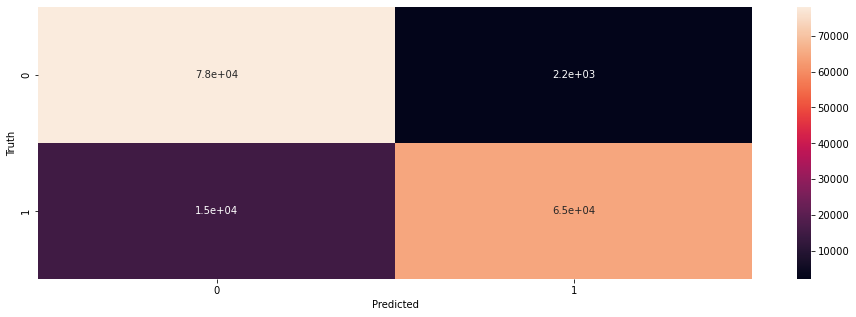

In [249]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [250]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, final_predictions_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     80244
           1       0.97      0.81      0.88     79756

    accuracy                           0.89    160000
   macro avg       0.90      0.89      0.89    160000
weighted avg       0.90      0.89      0.89    160000

